In [1]:
!python --version

Python 3.10.5


In [2]:
import pymc3 as pm
import numpy as np
from theano import tensor as tt
import pylab as plt
import pandas as pd

/usr/local/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
delta = 0.1
with pm.Model() as model:
    x = pm.Uniform('x', 0.1,1-(2*delta))
    y = pm.Uniform('y', 0.1,1-delta)
    z = pm.Uniform('z', 0.1,1)
    
    fin_y = pm.Deterministic('fin_y', tt.max([y, x+0.1]))
    fin_z = pm.Deterministic('fin_z', tt.max([z, fin_y+0.1]))

In [4]:
with model:
    trace = pm.sample()
#     advi = pm.ADVI()
#     approx = advi.fit(20000)
#     trace = approx.sample()

/tmp/ipykernel_7137/3173135835.py:2: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample()
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [z, y, x]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 6 seconds.


/tmp/ipykernel_7137/428382614.py:2: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace);


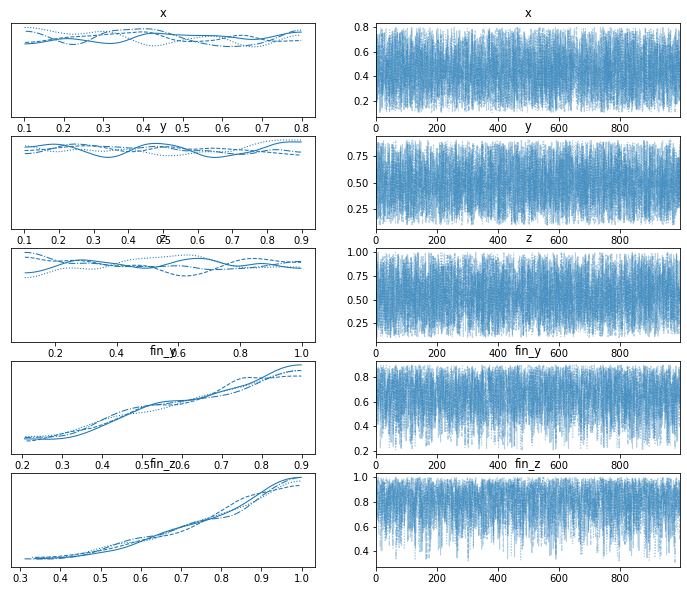

In [6]:
with model:
    pm.traceplot(trace);

In [7]:
x_t = trace['x']
y_t = trace['fin_y']
z_t = trace['fin_z']

In [8]:
x_lin = np.linspace(0,1)

Text(0, 0.5, 'y')

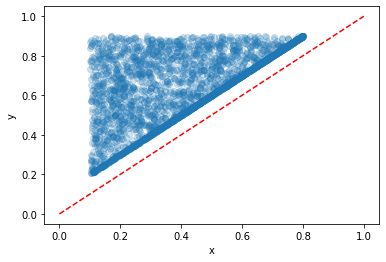

In [9]:
plt.scatter(x_t,y_t,label = 'x,y', alpha = 0.2)
plt.plot(x_lin,x_lin,linestyle = 'dashed', color = 'red')
plt.xlabel('x')
plt.ylabel('y')
# plt.xlim(0,1)
# plt.ylim(0,1)

Text(0, 0.5, 'z')

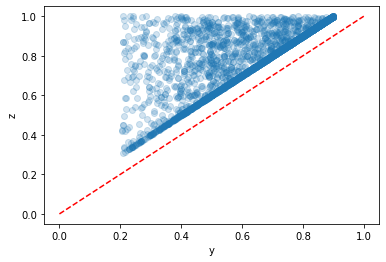

In [10]:
plt.scatter(y_t,z_t,label = 'y,z', alpha = 0.2)
plt.plot(x_lin,x_lin,linestyle = 'dashed', color = 'red')
plt.xlabel('y')
plt.ylabel('z')
# plt.xlim(0,1)
# plt.ylim(0,1)

In [11]:
ch_frame = pd.DataFrame(dict(
                    x = x_t,
                    y=y_t,
                    z=z_t))

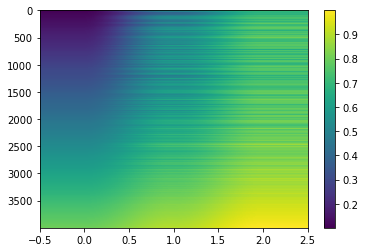

In [12]:
plt.imshow(ch_frame.sort_values(['x','y','z']).values,aspect='auto')
plt.colorbar()